### Problem Statement:
#### On the basis of given dataset we need to predict students performance in high schhool.

##### Import essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Load the dataset

In [2]:
df=pd.read_csv('student_data.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Visualization

In [5]:
def plot_count_with_annotations(df, column_name):
    """
    Plots a bar plot of value counts for the specified column in the DataFrame,
    with annotations showing the exact count values on top of each bar.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.
    """
    # Calculate value counts
    value_counts = df[column_name].value_counts()
    
    # Convert the value counts to a DataFrame for plotting
    value_counts_df = value_counts.reset_index()
    value_counts_df.columns = [column_name, 'count']
    
    # Plot using Seaborn
    plt.figure(figsize=(7,5))
    bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')
    
    # Annotate each bar with the exact number
    for p in bar_plot.patches:
        height = p.get_height()
        bar_plot.annotate(f'{height:.0f}',  
                          (p.get_x() + p.get_width() / 2., height), 
                          ha='center', va='center',
                          xytext=(0, 5), 
                          textcoords='offset points')
        
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Count')
    plt.show()

In [6]:
df['age'].value_counts()
df['age_group']=pd.cut(df['age'],bins=[0,15,18,np.inf],labels=['Under_age','Right_age','Over_age'],right=True)
df.drop('age',axis=1,inplace=True)
df.columns
columns_rearrange=['school', 'sex',
       'age_group', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
df=df[columns_rearrange]

In [7]:
excluded_columns=['G1', 'G2', 'G3','absences']
column_names=[i for i in df.columns if i not in excluded_columns]

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


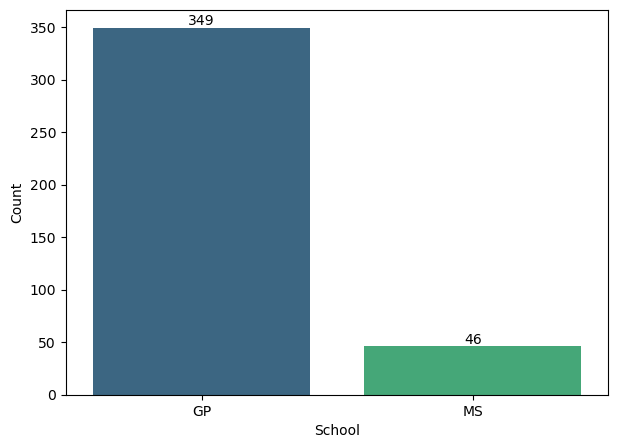

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


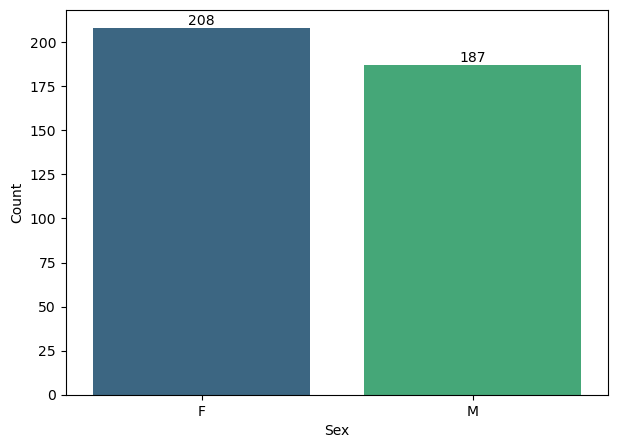

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


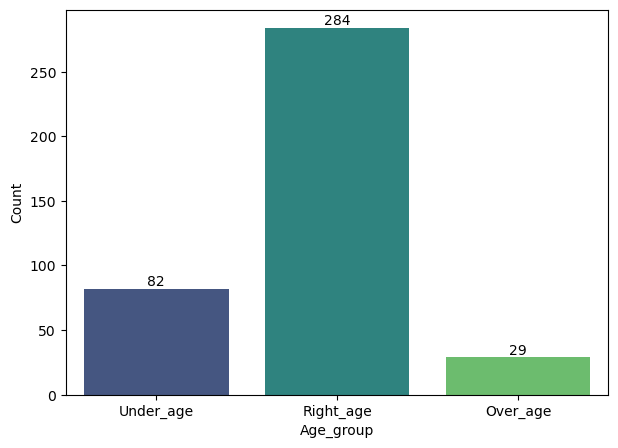

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


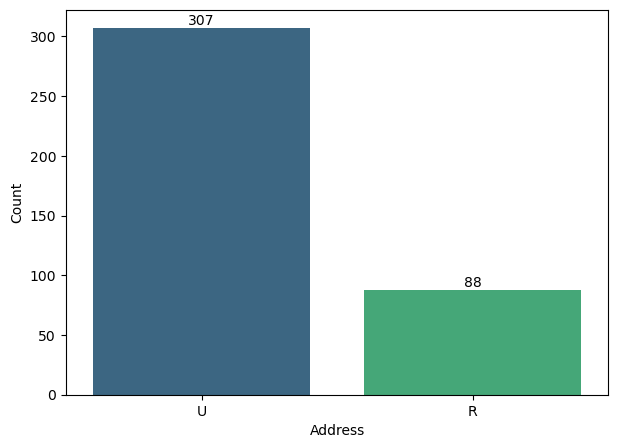

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


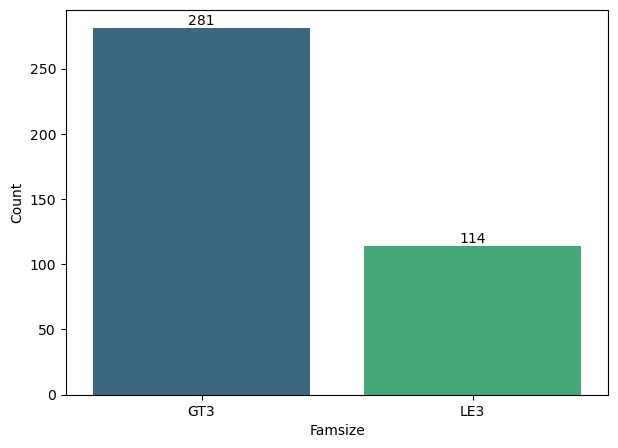

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


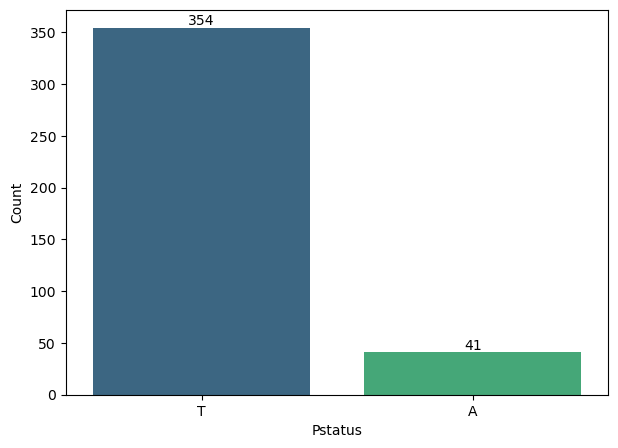

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


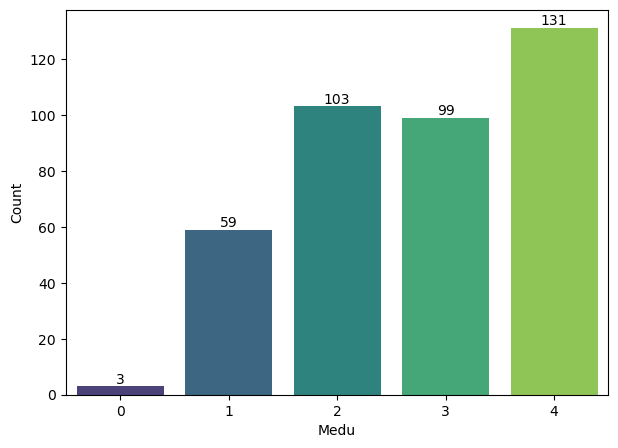

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


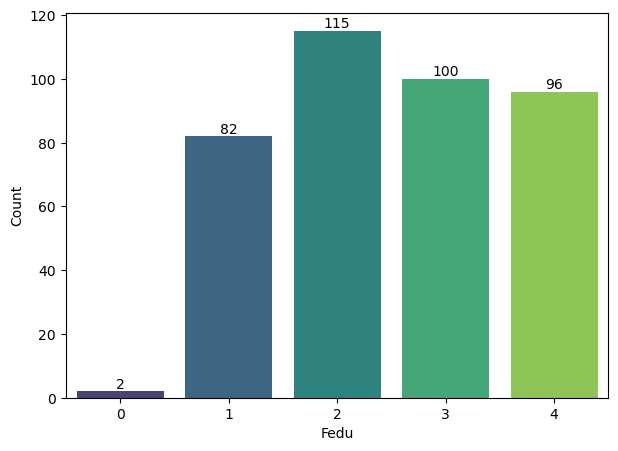

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


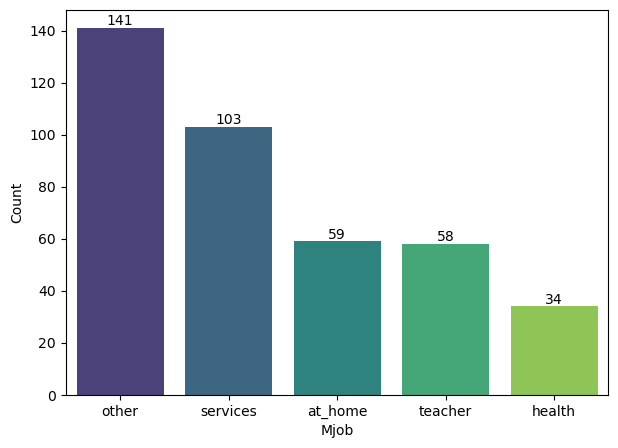

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


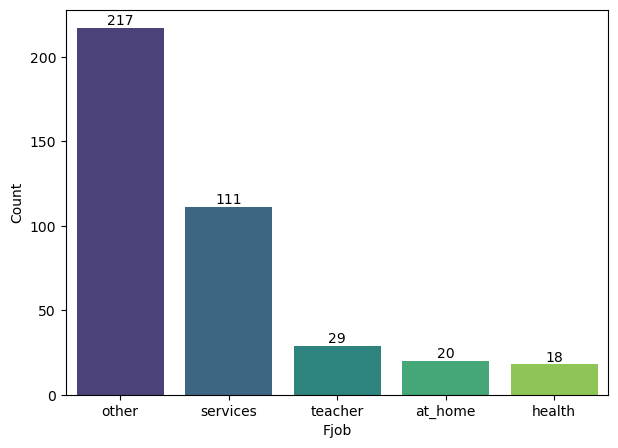

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


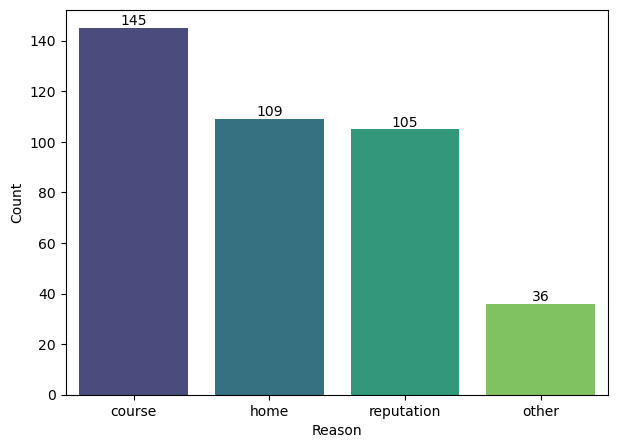

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


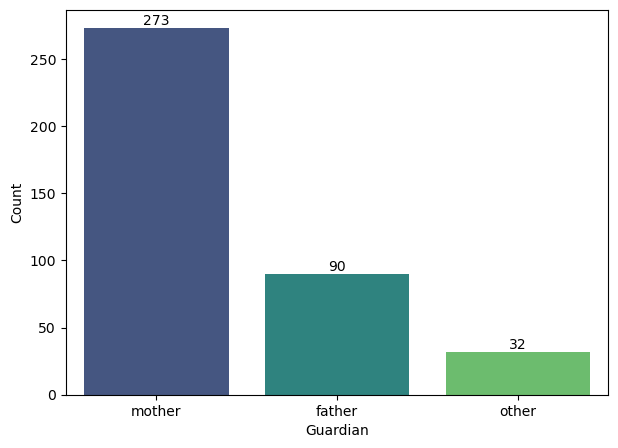

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


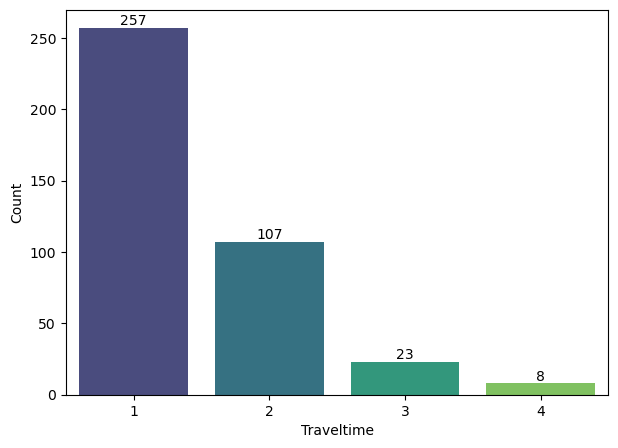

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


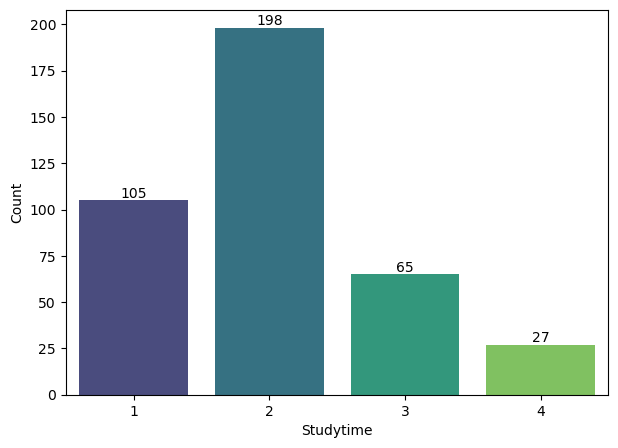

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


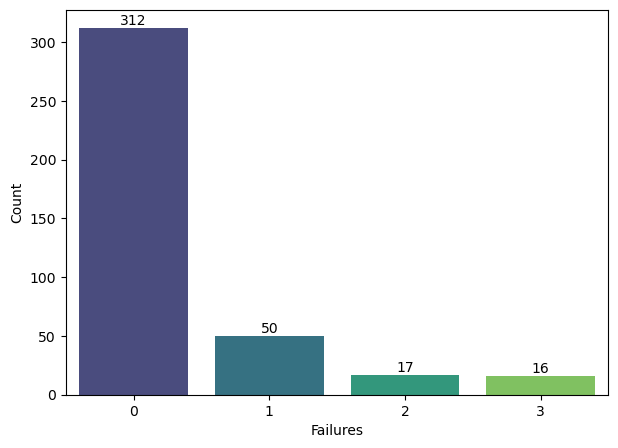

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


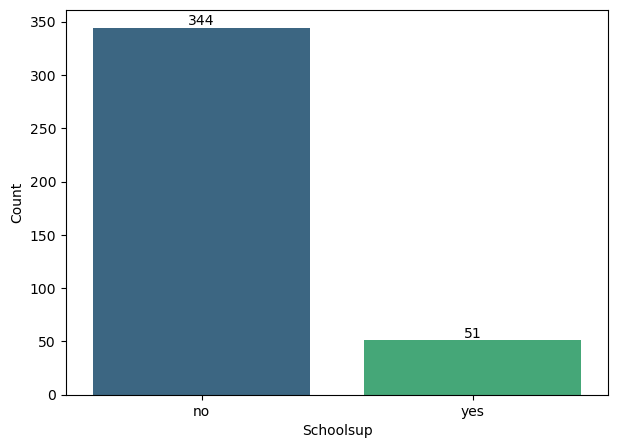

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


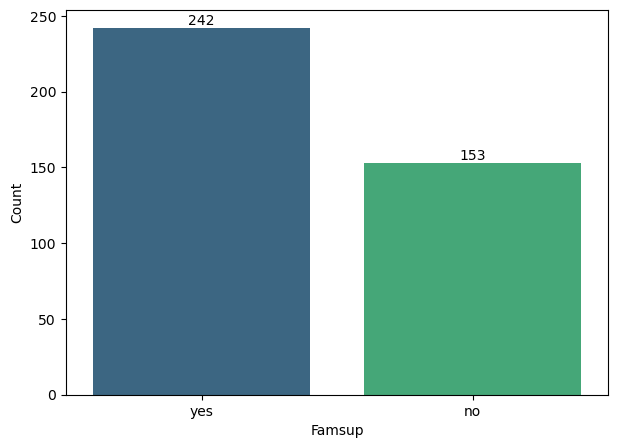

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


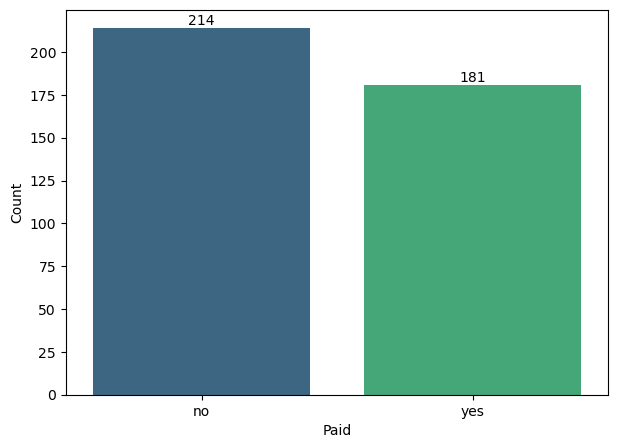

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


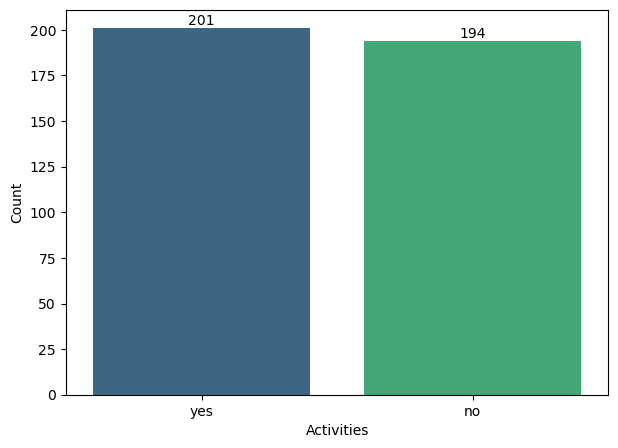

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


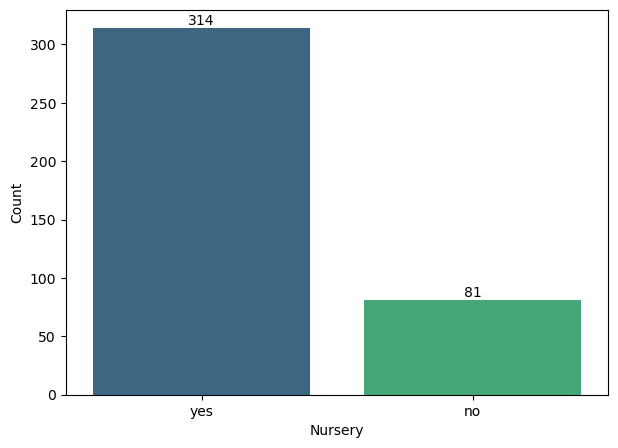

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


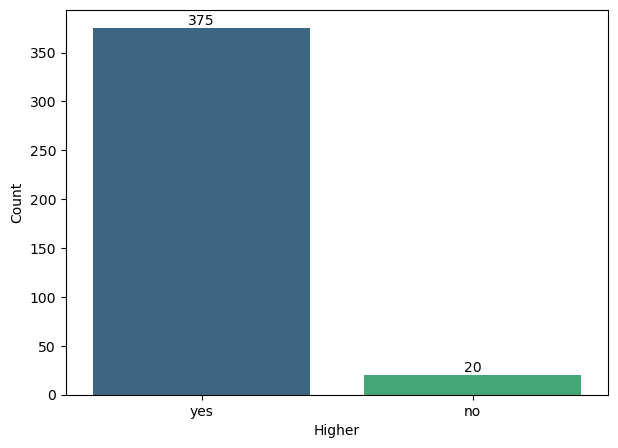

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


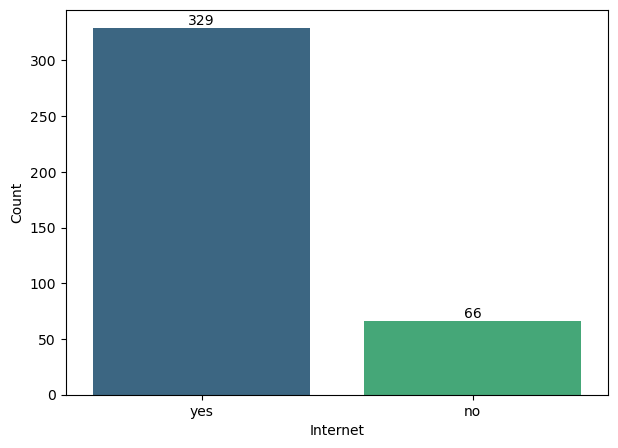

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


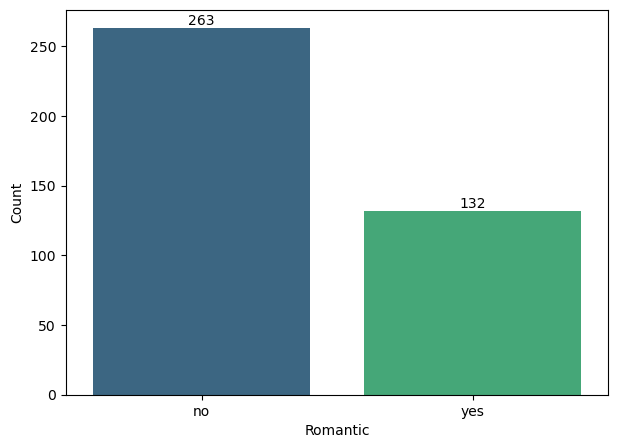

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


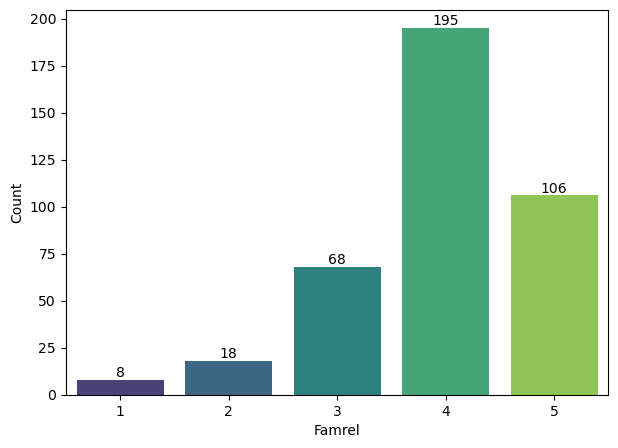

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


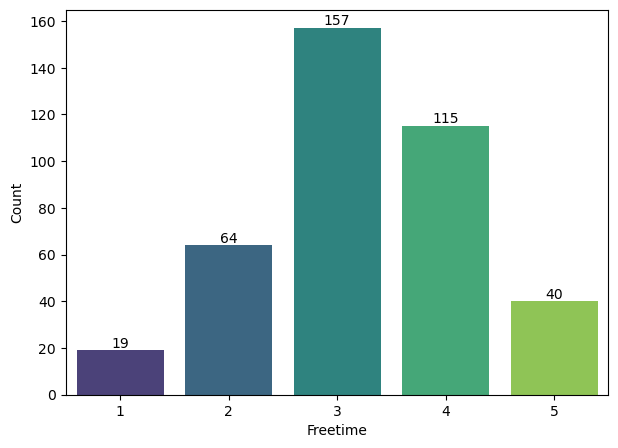

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


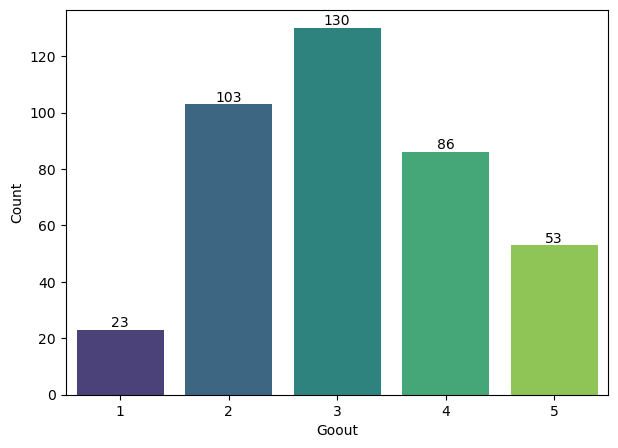

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


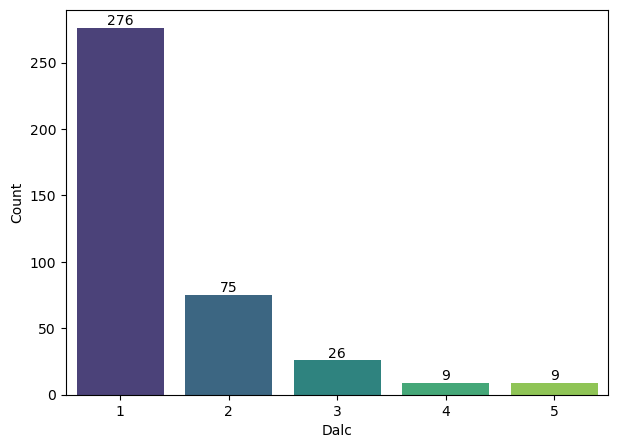

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


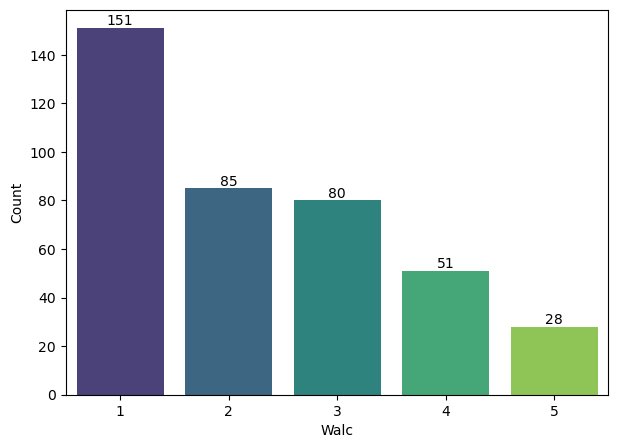

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/3115734451.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column_name, y='count', data=value_counts_df,palette='viridis')


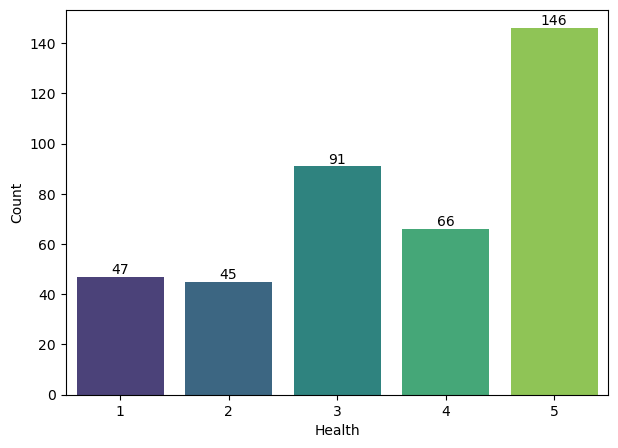

In [8]:
for i in column_names:
    plot_count_with_annotations(df,i)

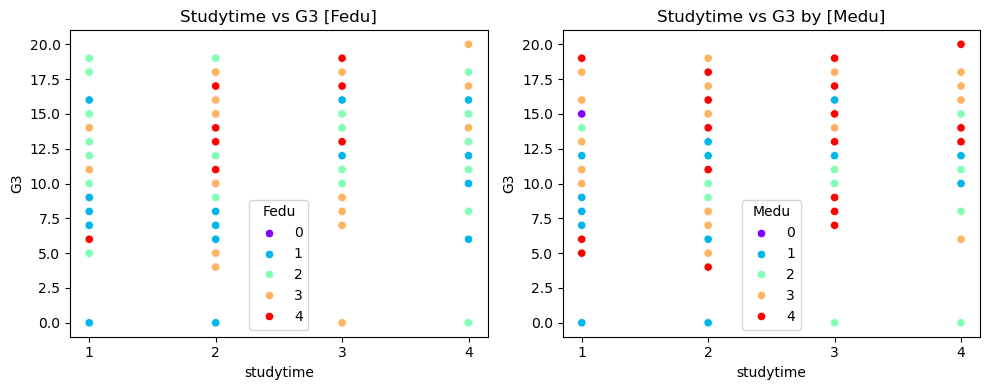

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
study_G3_Fedu=sns.scatterplot(x='studytime',y='G3',data=df,hue='Fedu',palette='rainbow')
plt.xticks(range(int(df['studytime'].min()), int(df['studytime'].max()) + 1, 1))
# study_G3_Fedu.legend(loc='upper right')
plt.title("Studytime vs G3 [Fedu]")

plt.subplot(1,2,2)
study_G3_Medu=sns.scatterplot(x='studytime',y='G3',data=df,hue='Medu',palette='rainbow')
plt.xticks(range(int(df['studytime'].min()), int(df['studytime'].max()) + 1, 1))
# study_G3_Medu.legend(loc='upper right')
plt.title("Studytime vs G3 by [Medu]")
plt.tight_layout()
plt.show()

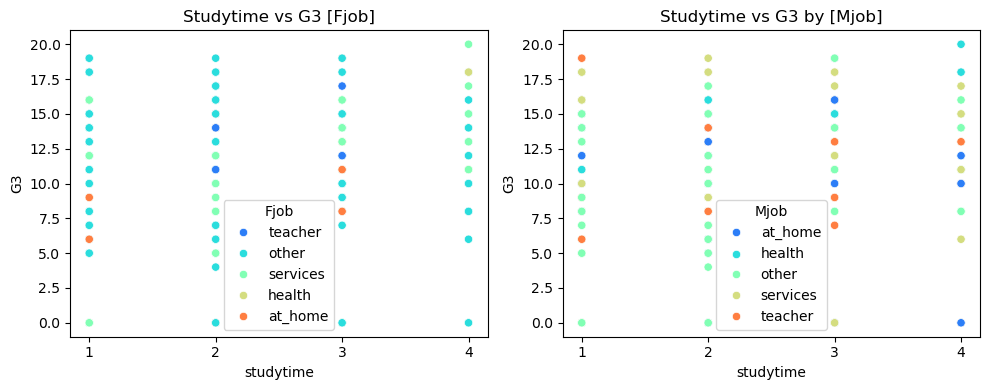

In [10]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
study_G3_Fedu=sns.scatterplot(x='studytime',y='G3',data=df,hue='Fjob',palette='rainbow')
plt.xticks(range(int(df['studytime'].min()), int(df['studytime'].max()) + 1, 1))
# study_G3_Fedu.legend(loc='upper right')
plt.title("Studytime vs G3 [Fjob]")

plt.subplot(1,2,2)
study_G3_Medu=sns.scatterplot(x='studytime',y='G3',data=df,hue='Mjob',palette='rainbow')
plt.xticks(range(int(df['studytime'].min()), int(df['studytime'].max()) + 1, 1))
# study_G3_Medu.legend(loc='upper right')
plt.title("Studytime vs G3 by [Mjob]")
plt.tight_layout()
plt.show()

##### I am trying to figure out relation between studytime,grade,Fedu and Medu.

In [11]:
df_temp=df[['Fedu','Medu','studytime','G1','G2','G3']]
df_temp.corr()

,Fedu,Medu,studytime,G1,G2,G3
Fedu,1.000000,0.623455,-0.009175,0.190270,0.164893,0.152457
Medu,0.623455,1.000000,0.064944,0.205341,0.215527,0.217147
studytime,-0.009175,0.064944,1.000000,0.160612,0.135880,0.097820
G1,0.190270,0.205341,0.160612,1.000000,0.852118,0.801468
G2,0.164893,0.215527,0.135880,0.852118,1.000000,0.904868
G3,0.152457,0.217147,0.097820,0.801468,0.904868,1.000000


#### Observation :
1. After observing I found that father's and mother's education doest not affect grades of their child.
2. Grades G1,G2 and G3 are directly proportional to each other.

<Axes: xlabel='absences', ylabel='G3'>

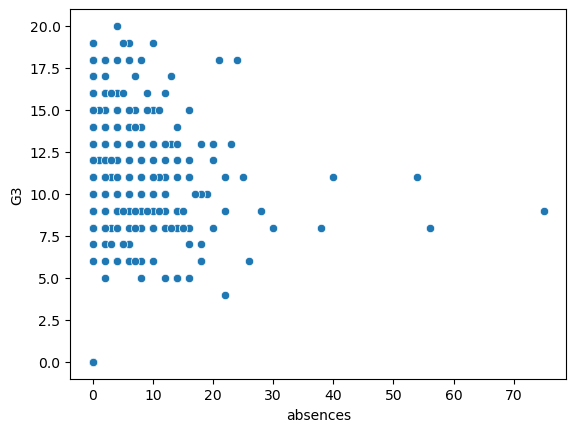

In [12]:
sns.scatterplot(x='absences',y='G3',data=df)


#### Observation : There is no strong correlation between absences and Grade G3

In [13]:
df=df.replace({'yes':True,'no':False})
df['age_group']=df['age_group'].astype(object)

/var/folders/vz/32zjh7mn0jx90p4xh4ntn2_80000gn/T/ipykernel_6822/2489436896.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({'yes':True,'no':False})


In [14]:
df.dtypes.value_counts()

int64     15
object    10
bool       8
Name: count, dtype: int64

In [15]:
inputs=df.drop('G3',axis=1)
outputs=df['G3']

##### Creating seperate pipelines for categorial and numerical attributes

In [16]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector,make_column_transformer
num_pipeline=make_pipeline(StandardScaler())
cat_pipeline=make_pipeline(OneHotEncoder())

preprocessing=make_column_transformer(
    (num_pipeline,make_column_selector(dtype_include=np.number)),
    (cat_pipeline,make_column_selector(dtype_include=object))
)
inputs_scaled_encoded=preprocessing.fit_transform(inputs)

In [17]:
inputs_scaled_encoded_df = pd.DataFrame(inputs_scaled_encoded)
df_preprocessed = pd.concat([inputs_scaled_encoded_df, outputs], axis=1)

#### Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled_encoded,outputs,test_size=0.3, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (276, 44)
x_test : (119, 44)
y_train : (276,)
y_test : (119,)


##### Modelling

#### 1. Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [20]:
linear_reg.fit(x_train,y_train)
y_pred_linear=linear_reg.predict(x_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred_linear)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred_linear)
print("R² Score:", r2)
mae = mean_absolute_error(y_test, y_pred_linear)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 4.9601489395654506
R² Score: 0.7743547161047444
Mean Absolute Error (MAE): 1.5060809480042017


In [22]:
results_table=pd.DataFrame([['Linear Regression',mae,mse,r2 ]],columns=['Model','MAE','MSE','R²'])
results_table

,Model,MAE,MSE,R²
0,Linear Regression,1.506081,4.960149,0.774355


#### 2. Lasso Regression

In [23]:
from sklearn.linear_model import LassoCV
lasso_reg=LassoCV(cv=5,alphas=[0.1, 1, 10, 100])
lasso_reg.fit(x_train,y_train)

LassoCV(alphas=[0.1, 1, 10, 100], cv=5)

In [24]:
y_pred_lasso=lasso_reg.predict(x_test)

In [25]:
mse = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred_lasso)
print("R² Score:", r2)
mae = mean_absolute_error(y_test, y_pred_lasso)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 4.2759683838759015
R² Score: 0.8054792080514936
Mean Absolute Error (MAE): 1.24533075036614


In [26]:
results_table1=pd.DataFrame([['Lasso Regression',mae,mse,r2]],columns=['Model','MAE','MSE','R²'])
results_table=pd.concat([results_table,results_table1],ignore_index=True)
results_table

,Model,MAE,MSE,R²
0,Linear Regression,1.506081,4.960149,0.774355
1,Lasso Regression,1.245331,4.275968,0.805479


#### 3. Ridge Regression

In [27]:
from sklearn.linear_model import RidgeCV
ridge_reg=RidgeCV(alphas=[0.1,1,10,100],cv=5)
ridge_reg.fit(x_train,y_train)

RidgeCV(alphas=[0.1, 1, 10, 100], cv=5)

In [28]:
y_pred_ridge=ridge_reg.predict(x_test)

In [29]:
mse = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred_ridge)
print("R² Score:", r2)
mae = mean_absolute_error(y_test, y_pred_ridge)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 4.790140331505922
R² Score: 0.7820886856080049
Mean Absolute Error (MAE): 1.4660133679058074


In [30]:
results_table2=pd.DataFrame([['Ridge Regression',mae,mse,r2]],columns=['Model','MAE','MSE','R²'])
results_table=pd.concat([results_table,results_table2],ignore_index=True)
results_table

,Model,MAE,MSE,R²
0,Linear Regression,1.506081,4.960149,0.774355
1,Lasso Regression,1.245331,4.275968,0.805479
2,Ridge Regression,1.466013,4.790140,0.782089


#### 4. Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor
decision_reg=DecisionTreeRegressor()
decision_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [32]:
y_pred_DT=decision_reg.predict(x_test)

In [33]:
mse = mean_squared_error(y_test, y_pred_DT)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred_DT)
print("R² Score:", r2)
mae = mean_absolute_error(y_test, y_pred_DT)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 4.126050420168068
R² Score: 0.8122992212998895
Mean Absolute Error (MAE): 1.134453781512605


In [34]:
results_table3=pd.DataFrame([['Decision Tree',mae,mse,r2]],columns=['Model','MAE','MSE','R²'])
results_table=pd.concat([results_table,results_table3],ignore_index=True)
results_table

,Model,MAE,MSE,R²
0,Linear Regression,1.506081,4.960149,0.774355
1,Lasso Regression,1.245331,4.275968,0.805479
2,Ridge Regression,1.466013,4.790140,0.782089
3,Decision Tree,1.134454,4.126050,0.812299


#### 5. Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
Rf=RandomForestRegressor()
Rf.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
y_pred_RF=Rf.predict(x_test)

In [37]:
mse = mean_squared_error(y_test, y_pred_RF)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(y_test, y_pred_RF)
print("R² Score:", r2)
mae = mean_absolute_error(y_test, y_pred_RF)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 3.433833613445378
R² Score: 0.8437892954434478
Mean Absolute Error (MAE): 1.0914285714285712


In [38]:
results_table4=pd.DataFrame([['Random Forest',mae,mse,r2]],columns=['Model','MAE','MSE','R²'])
results_table=pd.concat([results_table,results_table4],ignore_index=True)
results_table

,Model,MAE,MSE,R²
0,Linear Regression,1.506081,4.960149,0.774355
1,Lasso Regression,1.245331,4.275968,0.805479
2,Ridge Regression,1.466013,4.790140,0.782089
3,Decision Tree,1.134454,4.126050,0.812299
4,Random Forest,1.091429,3.433834,0.843789


In [39]:
results_table[['MAE','MSE','R²']]=results_table[['MAE','MSE','R²']].round(2)

In [40]:
results_table = results_table.sort_values(by='R²').reset_index(drop=True)
results_table

,Model,MAE,MSE,R²
0,Linear Regression,1.51,4.96,0.77
1,Ridge Regression,1.47,4.79,0.78
2,Lasso Regression,1.25,4.28,0.81
3,Decision Tree,1.13,4.13,0.81
4,Random Forest,1.09,3.43,0.84


### Here best model is `Random Forest` with `R²` score of `0.85`.
